<a href="https://colab.research.google.com/github/tistkorea/tour/blob/main/naver_blog_market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install customized_konlpy

In [ ]:
pip install konlpy

In [ ]:
pip install WordCloud

In [ ]:
pip install matplotlib

In [ ]:
pip install request

In [ ]:
!apt-get install fonts-nanum*
all_fonts_I_can_use = fm.findSystemFonts(fontpaths=None, fontext='ttf')
all_fonts_I_can_use

In [18]:
import os
import sys
import urllib.request
import bs4
import json
import pandas as pd
import re
from konlpy.tag import Okt
from ckonlpy.tag import Twitter
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


client_id = "3p6OGWvarRms7R8OMONm"
client_secret = "jWPaUQ0h51"

query = urllib.parse.quote(input("검색할 단어"))
idx = 0
display = 100
start = 1
end = 1000
star = "sim"

web_df = pd.DataFrame(columns=("Title", "Description"))

for start_index in range(start, end, display):

  url = "https://openapi.naver.com/v1/search/blog?query=" + query \
        + "&display=" + str(display) \
        + "&start=" + str(start_index)

  request = urllib.request.Request(url)
  request.add_header("X-Naver-Client-Id", client_id)
  request.add_header("X-Naver-Client-Secret", client_secret)
  response = urllib.request.urlopen(request)
  rescode = response.getcode()
  if(rescode==200):
      response_body = response.read()
      response_dict = json.loads(response_body.decode('utf-8'))
      items = response_dict['items']
      for item_index in range(0, len(items)):
        remove_tag = re.compile('<.*?>')
        title = re.sub(remove_tag, '', items[item_index]['title'])
        #link = items[item_index]['link']
        description = re.sub(remove_tag, '', items[item_index]['description'])
        web_df.loc[idx] = [title, description]
        idx += 1
  else:
      print("Error Code:" + rescode)

web_df.to_csv('/content/blog_city_inch.csv', index=False)


검색할 단어인천


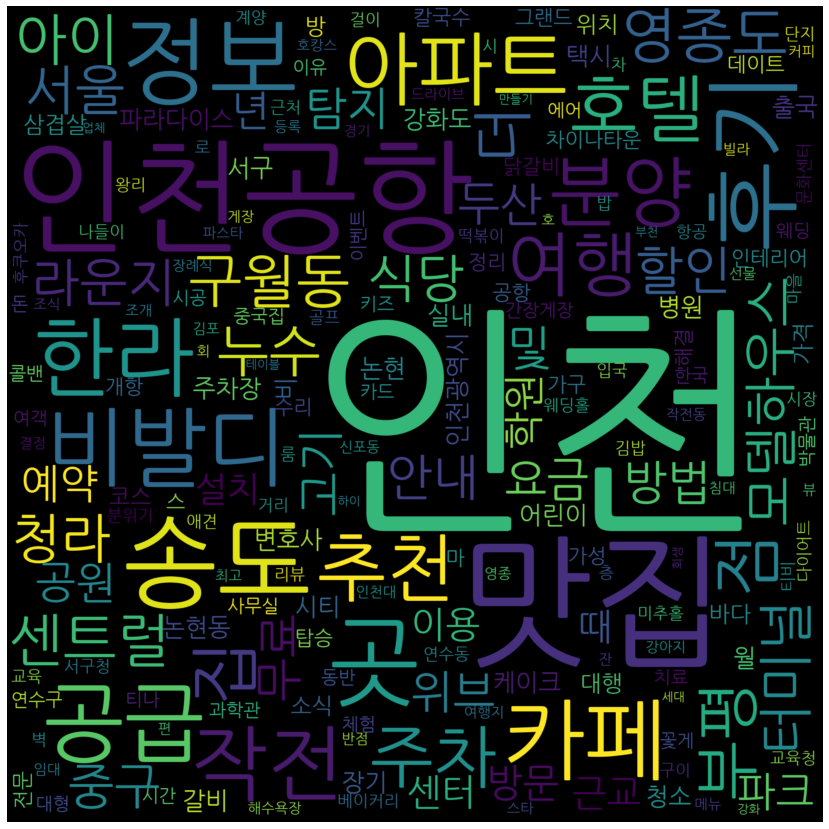

In [19]:

#df = pd.read_csv('/content/web_market_tredi.csv', encoding="utf-8")
df = web_df

content_all = ''
for i in range(len(df['Title'])):
  content_all = content_all + '' + df['Title'].loc[i]

content_all = re.sub('[^ㄱ-ㅣ 가-힣]', "", content_all)
content_all = str(content_all)

okt = Okt()
nouns_txt = okt.nouns(content_all)

Twitter = Twitter()
Twitter.add_dictionary('간편과일', 'Noun')
Twitter.add_dictionary('간편 과일', 'Noun')


count = Counter(nouns_txt)
rank_text = count.most_common()
rank_text = {word: freq for word, freq in count.most_common()}


rank_text = dict(rank_text)
count_len = 1
temp_dic = {}
for key, value in rank_text.items():
  if value > count_len:
    temp_dic[key] = value
rank_text = temp_dic

k_stopword = pd.read_csv("/content/korean_stopword.csv")
k_stopword = list(k_stopword['불용어'])
k_stopword.append('어요')

temp_dic = {}
for key, value in rank_text.items():
  if key not in k_stopword:
    temp_dic[key] = value
# generate word cloud from a dictionary of word frequencies
wordcloud = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf', width=400, height=400, scale=5.0, max_font_size=120)
wc = wordcloud.generate_from_frequencies(rank_text)

# plot and save the word cloud
plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.savefig("/content/blog_city_inch.png")
plt.show()

In [ ]:
from konlpy.tag import Okt
okt = Okt()
nouns_txt = okt.nouns(content_all)
nouns_txt

In [ ]:
from ckonlpy.tag import Twitter
Twitter = Twitter()

Twitter.add_dictionary('간편과일', 'Noun')
Twitter.add_dictionary('간편 과일', 'Noun')

content_all

In [34]:
from collections import Counter
count = Counter(nouns_txt)
rank_text = count.most_common()
rank_text = {word: freq for word, freq in count.most_common()}


In [ ]:
rank_text = dict(rank_text)
count_len = 1
temp_dic = {}
for key, value in rank_text.items():
  if value > count_len:
    temp_dic[key] = value
rank_text = temp_dic
rank_text

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

rank_text = dict(rank_text)
count_len = 1
temp_dic = {}
for key, value in rank_text.items():
  if value > count_len:
    temp_dic[key] = value
rank_text = temp_dic

k_stopword = pd.read_csv("/content/korean_stopword.csv")
k_stopword = list(k_stopword['불용어'])
k_stopword.append('어요')

temp_dic = {}
for key, value in rank_text.items():
  if key not in k_stopword:
    temp_dic[key] = value
# generate word cloud from a dictionary of word frequencies
wordcloud = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf', width=400, height=400, scale=5.0, max_font_size=120)
wc = wordcloud.generate_from_frequencies(rank_text)

# plot and save the word cloud
plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.savefig("/content/market.png")
plt.show()